# Steam Games EDA

### Simple Questions

1. Best Game Genre by Year
2. Price Effect on Estimated Owners
3. Reveiws effects on Estimated Owners

### Complex Questions

1. Classifying a game as successful based on estimated owners and reviews

##     1. Importing Pandas and the Steam dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Change for personal Use
file_path = r"C:\Users\lpenn\OneDrive\Desktop\Data_Science_Projects\games.csv"
steam_data_unclean = pd.read_csv(file_path, index_col = False)
pd.set_option('display.max_columns', None)

In [5]:
steam_data_unclean

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111447,3600970,Paragon Of Time,"Apr 10, 2025",0 - 20000,0,0,2.99,0,0,"You stand at the edge of time, trying to save ...",['English'],[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,paragonoftime.support@pm.me,True,False,False,0,NaN,0,5,0,NaN,0,0,NaN,0,0,0,0,Webcess,Webcess,"Single-player,Full controller support,Steam Cl...","Action,Casual,Indie","Action Roguelike,Bullet Hell,Hack and Slash,Ro...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
111448,3543710,A Few Days With : Hazel,"Ap

## 2. Initial Observations

In [6]:
## Finding Data Types
steam_data_unclean.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
Discount                        int64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements

In [7]:
#finding Null Values
null_count = steam_data_unclean.isnull().sum()
null_count

AppID                              0
Name                               6
Release date                       0
Estimated owners                   0
Peak CCU                           0
Required age                       0
Price                              0
Discount                           0
DLC count                          0
About the game                  6483
Supported languages                0
Full audio languages               0
Reviews                       100828
Header image                       0
Website                        64994
Support url                    60693
Support email                  19025
Windows                            0
Mac                                0
Linux                              0
Metacritic score                   0
Metacritic url                107447
User score                         0
Positive                           0
Negative                           0
Score rank                    111408
Achievements                       0
R

As shown above, many columns, such as Score Rank and Achivments are have null values across the whole dataset, and simply aren't valuable to us. Other columns such as Movie or Screenshot simply don't contain useful information when trying to answer our questions, and so they are not valuable to us.

## Data Preperation

In [8]:
##Dropping unnessecarry columns
steam_data_clean = steam_data_unclean.drop(columns=['AppID','About the game','Full audio languages','Reviews','Header image', 'Website', 'Support url', 'Support email',
                                                   'Metacritic url', 'Score rank', 'Achievements','Notes','Screenshots', 'Movies', 'Metacritic score', 'User score',
                                                    'Supported languages', 'Recommendations', 'Average playtime two weeks', 'Median playtime two weeks', 'Discount', 'DLC count',
                                                   'Required age'])

##Removing duplicate rows
steam_data_clean = steam_data_clean.drop_duplicates()

In [9]:
#Dropping all entries with 0 (almost no) estimated players
drop_rows = steam_data_clean[ steam_data_clean['Estimated owners'] == "0 - 0"].index
steam_data_clean.drop(drop_rows, inplace=True)

In [10]:
# Add a Total Reviews Row and delete any entry with less than 10 reviews
steam_data_clean.insert(9, 'Total Reviews', (steam_data_clean['Positive'] + steam_data_clean['Negative']))

# Steam does no release sale numbers, do total sales must be estimated based on reviews.
# Any game with less than 50 reviews likely did not get many players and did not sale well
drop_rows = steam_data_clean[ steam_data_clean['Total Reviews'] <= 50].index
steam_data_clean.drop(drop_rows, inplace=True)

In [11]:
#Fill in any remaining null values with "Unknown"
steam_data_clean.fillna("Unkown", inplace = True)

In [12]:
steam_data_clean.head()

,Name,Release date,Estimated owners,Peak CCU,Price,Windows,Mac,Linux,Positive,Total Reviews,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99,True,True,False,53,58,5,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
4,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0.00,True,True,False,50,58,8,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."
5,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0.00,True,False,False,87,136,49,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip..."
8,MazM: Jekyll and Hyde,"Apr 2, 2020",0 - 20000,1,14.99,True,False,False,76,82,6,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer..."
9,Deadlings: Rotten Edition,"Nov 11, 2014",50000 - 100000,0,3.99,True,True,True,225,270,45,703,782,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie","Action,Indie,Adventure,Puzzle-Platformer,Arcad..."


Steam is the main platform for game purchasing and distribution. Given the large number of games uploaded onto steam there are bound the be large outliers in Estimated Owner counts and Price, anlysis of which is crucial to answer the research questions.

### Extracting Date Information into a more useable format

This will be helpful later when plotting variables over time

In [13]:
dates = pd.DatetimeIndex(steam_data_clean['Release date'])

In [14]:
steam_data_clean.insert(1, 'Year', dates.year)
steam_data_clean.insert(2, 'Month', dates.month)
steam_data_clean.insert(3, 'Day', dates.day)
steam_data_clean.drop(columns = ['Release date'])

,Name,Year,Month,Day,Estimated owners,Peak CCU,Price,Windows,Mac,Linux,Positive,Total Reviews,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags
1,Train Bandit,2017,10,12,0 - 20000,0,0.99,True,True,False,53,58,5,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
4,Two Weeks in Painland,2020,2,3,0 - 20000,0,0.00,True,True,False,50,58,8,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."
5,Wartune Reborn,2021,2,26,50000 - 100000,68,0.00,True,False,False,87,136,49,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip..."
8,MazM: Jekyll and Hyde,2020,4,2,0 - 20000,1,14.99,True,False,False,76,82,6,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer..."
9,Deadlings: Rotten Edition,2014,11,11,50000 - 100000,0,3.99,True,True,True,225,270,45,703,782,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie","Action,Indie,Adventure,Puzzle-Platformer,Arcad..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111396,S.O.V: Passenger 23,2025,3,13,0 - 20000,0,1.99,True,False,False,48,59,11,0,0,IGNUS NEX ENTERTAINMENT,IGNUS NEX ENTERTAINMENT,"Single-player,Family Sharing","Action,Adventure,RPG","Horror,Psychological Horror,Retro,Indie,Explor..."
111401,Legends of Immortality,2025,3,4,0 - 20000,7,8.99,True,False,False,47,76,29,0,0,云梦山工作室,方块游戏(CubeGame),"Single-player,Steam Achievements,Family Sharing","Casual,Indie,RPG,Simulation,Strategy,Early Access","Simulation,Casual,RPG,Strategy,Singleplayer,St..."
111441,Nautical Survival,2025,4,9,0 - 20000,14,6.99,True,False,False,78,78,0,0,0,Idan Rooze,Idan Rooze,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Casual,Indie,Racing,Sports,Ea...","Action Roguelike,Arena Shooter,Bullet Hell,Rog..."
111443,Pax Augusta,2025,4,17,0 - 20000,524,19.99,True,False,False,144,178,34,0,0,Roger Gassmann,Senatis,"Single-player,Steam Achievements,Steam Cloud,F...","Simulation,Strategy","Simulation,Strategy,Rome,City Builder,Historic..."


### New Estimated Owner Number

In [15]:
# Replace Estimated Ownsers column with a more accurate number/range
# Since Steam sales are not publically released, it must be estimated by review count
# This is not a very accurate metric to go by, so peak concurrnet player count will also be factored, although many smaller games lack this information

def new_owners_estimate(row):
    # Using a 30:1 ratio for Purchases:Reviews. This is a rough estimate for steam games, and will gradually grow given more players.
    # this estimate can fluctuate quite greatly, and better ways of estimating do exist.
    if(row['Estimated owners'] == '0 - 20000'):
        row['Estimated owners'] = ((row['Total Reviews'] * 30) + (row['Peak CCU'] * 5))
        return row
        
    elif(row['Estimated owners'] == '20000 - 50000'):
        row['Estimated owners'] = ((row['Total Reviews'] * 35) + (row['Peak CCU'] * 5))
        return row
        
    elif(row['Estimated owners'] == '50000 - 100000'):
        row['Estimated owners'] = ((row['Total Reviews'] * 40) + (row['Peak CCU'] * 5))
        return row
        
    elif(row['Estimated owners'] == '100000 - 200000'):
        row['Estimated owners'] = ((row['Total Reviews'] * 45) + (row['Peak CCU'] * 5))
        return row
        
    elif(row['Estimated owners'] == '200000 - 500000'):
        row['Estimated owners'] = ((row['Total Reviews'] * 50) + (row['Peak CCU'] * 5))
        return row
        
    elif(row['Estimated owners'] == '500000 - 1000000'):
        row['Estimated owners'] = ((row['Total Reviews'] * 55) + (row['Peak CCU'] * 5))
        return row
        
    elif(row['Estimated owners'] == '1000000 - 2000000'):
        row['Estimated owners'] = ((row['Total Reviews'] * 60) + (row['Peak CCU'] * 5))
        return row
        
    elif(row['Estimated owners'] == '2000000 - 5000000'):
        row['Estimated owners'] = ((row['Total Reviews'] * 65) + (row['Peak CCU'] * 5))
        return row
        
    elif(row['Estimated owners'] == '5000000 - 10000000'):
        row['Estimated owners'] = ((row['Total Reviews'] * 70) + (row['Peak CCU'] * 5))
        return row
        
    elif(row['Estimated owners'] == '10000000 - 20000000'):
        row['Estimated owners'] = ((row['Total Reviews'] * 75) + (row['Peak CCU'] * 5))
        return row
        
    elif(row['Estimated owners'] == '20000000 - 50000000'):
        row['Estimated owners'] = ((row['Total Reviews'] * 80) + (row['Peak CCU'] * 5))
        return row
        
    elif(row['Estimated owners'] == '50000000 - 100000000'):
        row['Estimated owners'] = ((row['Total Reviews'] * 85) + (row['Peak CCU'] * 5))
        return row
        
    elif(row['Estimated owners'] == '50000000 - 100000000'):
        row['Estimated owners'] = ((row['Total Reviews'] * 90) + (row['Peak CCU'] * 5))
        return row
        
steam_data_clean = steam_data_clean.apply(new_owners_estimate, axis ='columns')
steam_data_clean

,Name,Year,Month,Day,Release date,Estimated owners,Peak CCU,Price,Windows,Mac,Linux,Positive,Total Reviews,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags
1,Train Bandit,2017.0,10.0,12.0,"Oct 12, 2017",1740.0,0.0,0.99,True,True,False,53.0,58.0,5.0,0.0,0.0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
4,Two Weeks in Painland,2020.0,2.0,3.0,"Feb 3, 2020",1740.0,0.0,0.00,True,True,False,50.0,58.0,8.0,0.0,0.0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."
5,Wartune Reborn,2021.0,2.0,26.0,"Feb 26, 2021",5780.0,68.0,0.00,True,False,False,87.0,136.0,49.0,0.0,0.0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip..."
8,MazM: Jekyll and Hyde,2020.0,4.0,2.0,"Apr 2, 2020",2465.0,1.0,14.99,True,False,False,76.0,82.0,6.0,0.0,0.0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer..."
9,Deadlings: Rotten Edition,2014.0,11.0,11.0,"Nov 11, 2014",10800.0,0.0,3.99,True,True,True,225.0,270.0,45.0,703.0,782.0,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie","Action,Indie,Adventure,Puzzle-Platformer,Arcad..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111396,S.O.V: Passenger 23,2025.0,3.0,13.0,"Mar 13, 2025",1770.0,0.0,1.99,True,False,False,48.0,59.0,11.0,0.0,0.0,IGNUS NEX ENTERTAINMENT,IGNUS NEX ENTERTAINMENT,"Single-player,Family Sharing","Action,Adventure,RPG","Horror,Psychological Horror,Retro,Indie,Explor..."
111401,Legends of Immortality,2025.0,3.0,4.0,"Mar 4, 2025",2315.0,7.0,8.99,True,False,False,47.0,76.0,29.0,0.0,0.0,云梦山工作室,方块游戏(CubeGame),"Single-player,Steam Achievements,Family Sharing","Casual,Indie,RPG,Simulation,Strategy,Early Access","Simulation,Casual,RPG,Strategy,Singleplayer,St..."
111441,Nautical Survival,2025.0,4.0,9.0,"Apr 9, 2025",2410.0,14.0,6.99,True,False,False,78.0,78.0,0.0,0.0,0.0,Idan Rooze,Idan Rooze,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Casual,Indie,Racing,Sports,Ea...","Action Roguelike,Arena Shooter,Bullet Hell,Rog..."
111443,Pax Augusta,2025.0,4.0,17.0,"Apr 17, 2025",7960.0,524.0,19.99,True,False,False,144.0,178.0,34.0,0.0,0.0,Roger Gassmann,Senatis,"Single-player,Steam Achievements,Steam Cloud,F...","Simulation,Strategy","Simulation,Strategy,Rome,City Builder,Historic..."


## EDA and Visualization

### Finding Outliers

Incredibly small games, those with 0 estimated owners, where removed earlier in data cleaning, however steam also has some incredibly large games that could make furthur analysis of the data difficult. Examples of such outliers can be seen on the below graph

<Axes: xlabel='Price', ylabel='Estimated owners'>

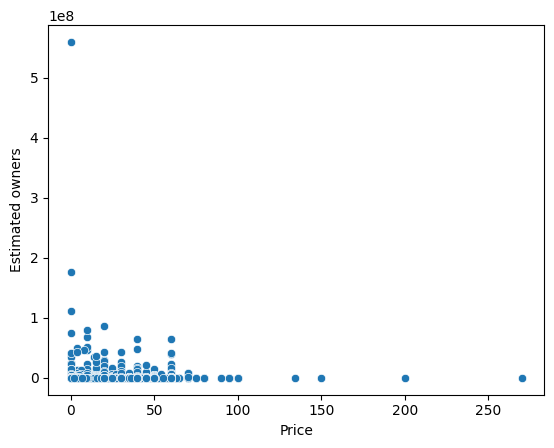

In [16]:
sns.scatterplot(x=steam_data_clean['Price'], y=steam_data_clean['Estimated owners'], data=steam_data_clean)

As the above graph shows, there are three major outliers in the estimated owners category and 4 outliers in the Price category, we will identify these outliers and store them seperatly from the rest of the data, as they could be useful later.

<Axes: xlabel='Price', ylabel='Estimated owners'>

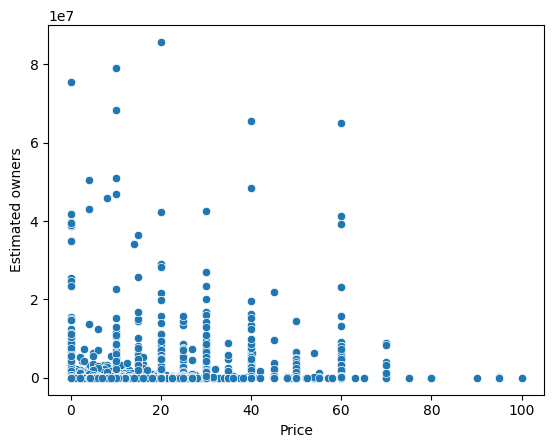

In [17]:
Outliers_Owners = steam_data_clean[steam_data_clean['Estimated owners' ]>= 100000000]
steam_data_clean = steam_data_clean[steam_data_clean['Estimated owners'] < 100000000]

Outliers_Price = steam_data_clean[steam_data_clean['Price' ]> 100]
steam_data_clean = steam_data_clean[steam_data_clean['Price'] <= 100]

sns.scatterplot(x=steam_data_clean['Price'], y=steam_data_clean['Estimated owners'], data=steam_data_clean)

The above graph is much clearer than the original and allows us to begin answer the first research question.

### Q1 Price Effect on estimated Owners

In [18]:
corr_data = steam_data_clean[['Estimated owners', 'Price', 'Peak CCU', 'Positive', 'Negative', 'Total Reviews']]
corr_data.corr()

,Estimated owners,Price,Peak CCU,Positive,Negative,Total Reviews
Estimated owners,1.000000,0.087516,0.266947,0.986603,0.747901,0.987859
Price,0.087516,1.000000,0.101045,0.094818,0.116599,0.100681
Peak CCU,0.266947,0.101045,1.000000,0.220507,0.181131,0.222582
Positive,0.986603,0.094818,0.220507,1.000000,0.716869,0.995985
Negative,0.747901,0.116599,0.181131,0.716869,1.000000,0.776403
Total Reviews,0.987859,0.100681,0.222582,0.995985,0.776403,1.000000


As can be seen above, Price seems to have very little correlation to Estimated Owners, espcially when compared to Total Reviews correlation. However, it is important to remember that the Estimated Owners values directly relate to Total Reviews and Peak CCU as those values where used to calculate Estimated Owners earlier, so this correlation matrix is likely unaccurate.

Despite the inaccuracy of this matrix, some information can be taken away from it. While Price defenitly has a larger effect on ownership, things like the total number of reviews and if they are positive or negative have a large impact on if a game sells well. While its certainly not as large of an impact as seen here, it would still be quite large, potentially even larger than price.

In [19]:
## Spliting the prices into bins so a simpilar yet effective line graph can be created.
graph_data = pd.DataFrame()
graph_data['Owners'] = steam_data_clean['Estimated owners']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
graph_data['Price Range'] = pd.cut(steam_data_clean['Price'], bins=bins, right = True)

In [20]:
## The cut function cause games that where price at 0 exactly to fill in as NaN values, hence the need to fillna with 0.0
categories = ['0.0'] + list(graph_data['Price Range'].cat.categories)
graph_data['Price Range'] = graph_data['Price Range'].cat.set_categories(categories)
graph_data.fillna("0.0", inplace = True)

C:\Users\lpenn\AppData\Local\Temp\ipykernel_10780\92812142.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  graph_data.groupby('Price Range')['Owners'].sum().plot(kind='bar')


<Axes: xlabel='Price Range'>

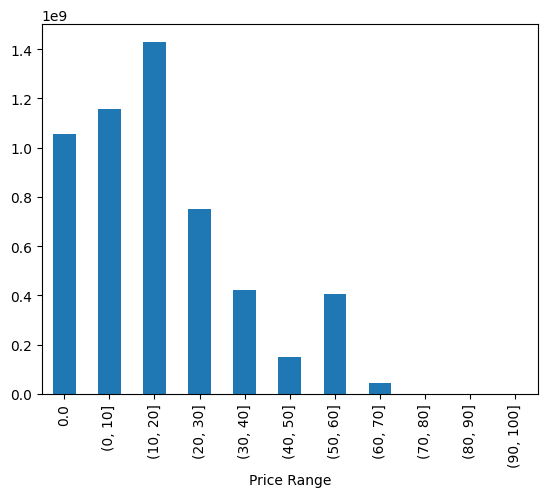

In [21]:
graph_data.groupby('Price Range')['Owners'].sum().plot(kind='bar')

The above graph shows that free games, and games with prices between 15-20 dollars sell very well. This makes since as the cheaper a game is the more likelypeople are to buy it. This data does not take into account the free games we removed earlier as outlies, which would make this trend even more distinct.

The graph also shows spikes at prices 30,40,50, and 60, with a small spike at 70. these smaller spikes make since as an increase in price would make a game less likely to sell to some individuals, and the price points 30,40,50 are not the most common prices for games to be.

The larger spike at 60 makes since since many mainstream games sold by larger studios will be priced at 60 dollars.
the spike at 70 has a similar reason, since some mainstream studio are trying to shift the standard price from 60 to 70

Games in the 80-100 dollar range are already uncommon (although some current trends could change that in the future), and given the scale of the graph sales for this range do not even appear

### Q1 Best Genre and Best Genre by Year

In [22]:
## Spliting Genre Data into a more usable form.
## Makes the Genres object for each row into lists, with each entry in the lists being a unique genre
steam_data_clean['Genres'] = steam_data_clean['Genres'].str.split(",")

In [23]:
## Using explode to split the data
## Each Genre becomes its own row allowing for easy counting
exploded_data = pd.DataFrame({'Genres': steam_data_clean['Genres']})
exploded_data = exploded_data.explode('Genres')
exploded_data

,Genres
1,Action
1,Indie
4,Adventure
4,Indie
5,Adventure
...,...
111443,Simulation
111443,Strategy
111445,Action
111445,Indie


In [24]:
## capitalizing all Genre Values so no duplicates are made due to different capitalization
exploded_data['Genres'] = exploded_data['Genres'].str.upper()

## Getting Values
values = pd.DataFrame(exploded_data.value_counts())

Text(0.5, 1.0, 'Most Popular Genres (All Time)')

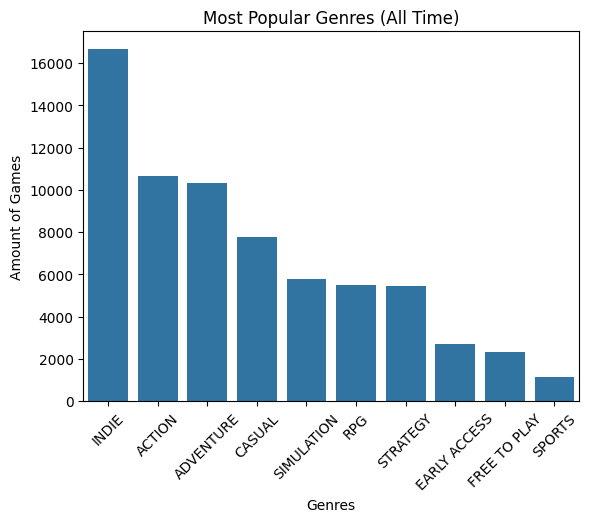

In [25]:
## Graph to better illustrate the difference in Genres
sns.barplot(x='Genres', y='count', data=values.head(10))
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Amount of Games")
plt.title("Most Popular Genres (All Time)")

The resulting data clearly shows that Indie is the most popular genre, followed by Action and Adventure

This makes since since INDIE, as a genre, can encompass any game made by indie developers, and the genres ACTION and ADVENTURE can apply to almost any type of game.

Given this information, I hypothosize that INDIE will be the most popular genre for most years, although the further back we go the less likely that is, since INDIE games have grown in popularity recently, within the last 5-10 years

In [26]:
## Using explode to split the data
## Each Genre becomes its own row allowing for easy counting
## Year is to tally data accuratly
exploded_data = pd.DataFrame({'Genres': steam_data_clean['Genres'], 'Year' : steam_data_clean['Year']})
exploded_data = exploded_data.explode('Genres')

In [27]:
## Getting the values for each genre and year
values = pd.DataFrame(exploded_data.value_counts().reset_index(name='count'))

Text(0.5, 1.0, 'Most Popular Genres (2012)')

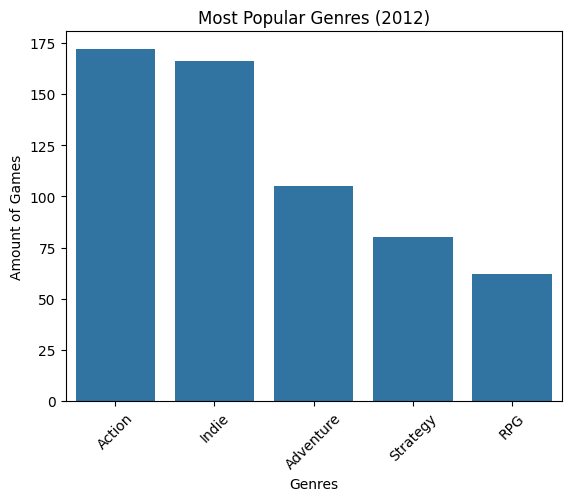

In [28]:
data_2012 = values[values['Year'] == 2012]
sns.barplot(x='Genres', y='count', data=data_2012.head(5))
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Amount of Games")
plt.title("Most Popular Genres (2012)")

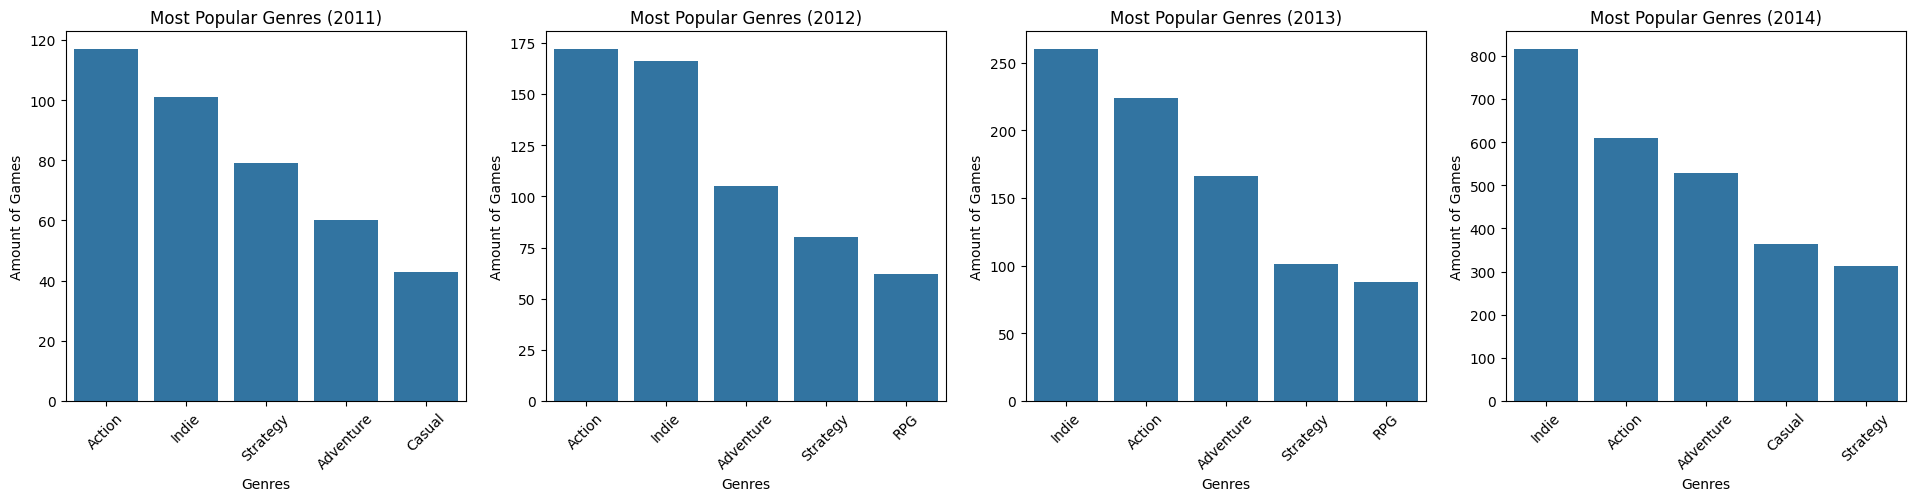

In [29]:
data_2011 = values[values['Year'] == 2011]
data_2012 = values[values['Year'] == 2012]
data_2013 = values[values['Year'] == 2013]
data_2014 = values[values['Year'] == 2014]

plt.subplot(1,4,1)
sns.barplot(x='Genres', y='count', data=data_2011.head(5))
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Amount of Games")
plt.title("Most Popular Genres (2011)")

plt.subplot(1,4,2)
sns.barplot(x='Genres', y='count', data=data_2012.head(5))
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Amount of Games")
plt.title("Most Popular Genres (2012)")

plt.subplot(1,4,3)
sns.barplot(x='Genres', y='count', data=data_2013.head(5))
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Amount of Games")
plt.title("Most Popular Genres (2013)")

plt.subplot(1,4,4)
sns.barplot(x='Genres', y='count', data=data_2014.head(5))
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Amount of Games")
plt.title("Most Popular Genres (2014)")

plt.subplots_adjust(right = 3)
plt.show()

The above graphs show that, while Action was once the most popular genre on steam, as time went on more and more Indie games got released until it overtook Action games by a large margin.

## Reviews Effect on Estimated Owners

This question will be harder to answer given the way Estimated Owners was calculated earlier. Normally a corrilation matrix would be a simple way to answer this question, however the correlation matrix made earlier (and shown below) cannot be consider accurate.

In [30]:
corr_data.corr()

,Estimated owners,Price,Peak CCU,Positive,Negative,Total Reviews
Estimated owners,1.000000,0.087516,0.266947,0.986603,0.747901,0.987859
Price,0.087516,1.000000,0.101045,0.094818,0.116599,0.100681
Peak CCU,0.266947,0.101045,1.000000,0.220507,0.181131,0.222582
Positive,0.986603,0.094818,0.220507,1.000000,0.716869,0.995985
Negative,0.747901,0.116599,0.181131,0.716869,1.000000,0.776403
Total Reviews,0.987859,0.100681,0.222582,0.995985,0.776403,1.000000


Instead of using a simple correlation matrix to show the effect we will compare different graphs to determine the effects of reviews.

It is safe to say that the more reviews a game has the more owners it has, both because that was part of our Estimated Owner calculations, and because the more reviews a game has the more players it must have. What we are really interested in is how Positive/Negative reviews effect sales

<Axes: xlabel='Estimated owners', ylabel='Positive'>

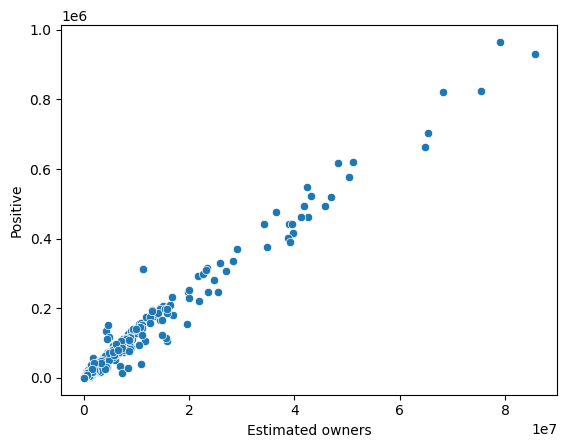

In [31]:
sns.scatterplot(x='Estimated owners', y='Positive', data=steam_data_clean)

As can be seen in the above graph, as a game gets more positive reviews, it tends to get more players. This makes since as the better a game is recived the more likely others are to buy it. 

It is possible that this graph is slightly effected by the Estimated Owner calculation done earlier. Even though that calculation was done with total reviews in mind, there tend to be more positive reviews on games than negative. This idea will be further explained with the next graph.

<Axes: xlabel='Estimated owners', ylabel='Negative'>

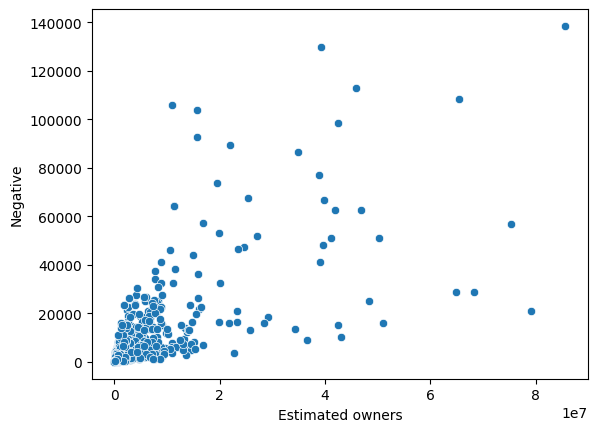

In [32]:
sns.scatterplot(x='Estimated owners', y='Negative', data=steam_data_clean)

In comparison to the positive reviews graph, the negative reviews show a very different story.

This graph shows that a large number of negative reviews can drastically effect a games sales. This can best be seen by the games with a very large number of negative reviews that do not have a lot of sales. This trend does not always stay true though, which is demonstrated by the fact that the highest selling game on the graph also has the most negative reviews.

There is another aspect to negative reviews that this data cannot represent, and that is the idea that a game does well for a time, getting many sales, and then decreses in quality causing an influx of negative reviews. If more presie review data could be gathered, with information like the date the review was posted, then it would be possible to see if certain games were effected by this, and what changes caused it. This would be a good way to find out what not to do when creating and maintaining a game, but with the current data it is not possible.

Returning to the idea that the positive review graph may be slightly biased, we can see that the total reviews on the positive graph go up to 1e6 or 1,000,000 while the highest number of negative reviews is 140,000. Since review total has such a big imapact on the way Estimated owners was calculated the larger amount of positive reviews compared to negative would have more sway on Ownership. An improved method for calculating Estimated Owners that does not rely so much on review numbers would help alliveate this problem, and potentially show more insites into the correlation between positive reviews and ownership.